In [785]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [786]:
data=pd.read_csv(r"C:\Users\S\Desktop\AI-ML-DS L3PP\Classisfication\Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [787]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [788]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [789]:
x=data.iloc[:,1:4].values
x[:5]

array([['Male', 19, 19000],
       ['Male', 35, 20000],
       ['Female', 26, 43000],
       ['Female', 27, 57000],
       ['Male', 19, 76000]], dtype=object)

In [790]:
type(x)

numpy.ndarray

In [791]:
y=data.iloc[:,4:].values
y[:5]
y.shape

(400, 1)

In [792]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(
    [
        ("one hot encoding",OneHotEncoder(),[0]),
        ("StandardScaler",StandardScaler(),[1,2]),
    ],
    remainder="passthrough"
)
x=ct.fit_transform(x)
x=x[:,1:]
x[:5]

array([[ 1.        , -1.78179743, -1.49004624],
       [ 1.        , -0.25358736, -1.46068138],
       [ 0.        , -1.11320552, -0.78528968],
       [ 0.        , -1.01769239, -0.37418169],
       [ 1.        , -1.78179743,  0.18375059]])

In [793]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=47)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320, 3), (80, 3), (320, 1), (80, 1))

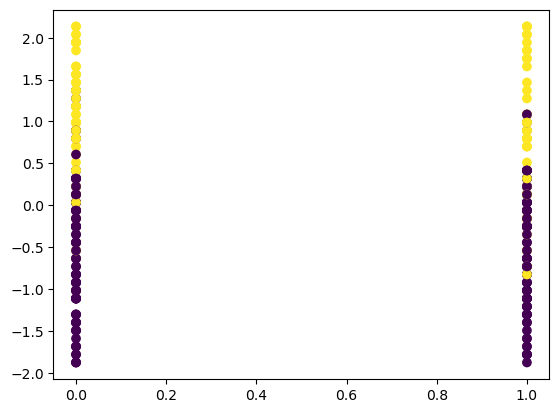

In [794]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)

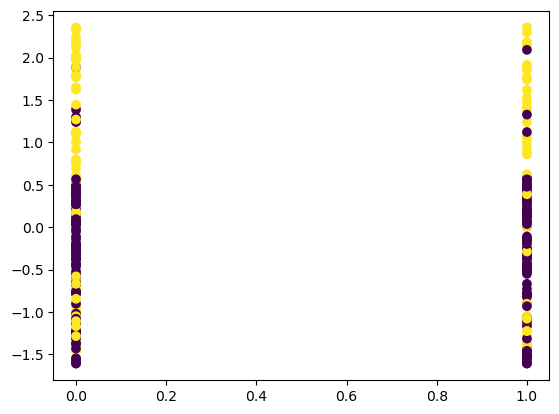

In [795]:
plt.scatter(x_train[:,0],x_train[:,2],c=y_train)

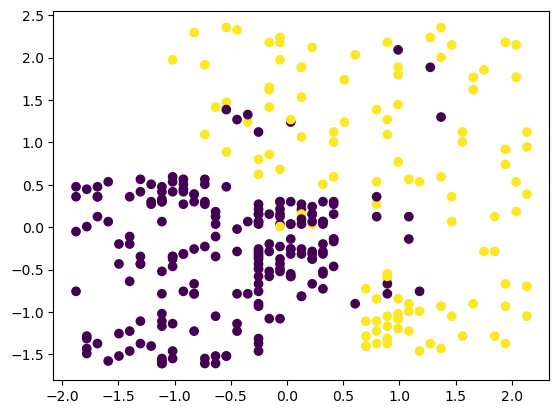

In [796]:
plt.scatter(x_train[:,1],x_train[:,2],c=y_train)

In [797]:
x=torch.tensor(x,dtype=torch.float32)
x,x.dtype

(tensor([[ 1.0000, -1.7818, -1.4900],
         [ 1.0000, -0.2536, -1.4607],
         [ 0.0000, -1.1132, -0.7853],
         ...,
         [ 0.0000,  1.1791, -1.4607],
         [ 1.0000, -0.1581, -1.0789],
         [ 0.0000,  1.0836, -0.9908]]),
 torch.float32)

In [798]:
from torch.utils.data import Dataset,DataLoader
from torch import nn
from torch import optim

In [799]:
class Data(Dataset):
    def __init__(self,x,y):
        super().__init__()
        self.x=torch.tensor(x,dtype=torch.float32)
        self.y=torch.tensor(y,dtype=torch.float32)
        
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.x.shape[0]
    
d1=Data(x_train,y_train)[300] 

In [800]:
d1,len(Data(x_train,y_train))

((tensor([ 0.0000,  0.8926, -0.5797]), tensor([1.])), 320)

In [801]:
train_data=Data(x_train,y_train)
test_data=Data(x_test,y_test)

In [802]:
tarin_dataloader=DataLoader(
    dataset=train_data,
    shuffle=True,
    batch_size=16,
    drop_last=False,
)
test_dataloader=DataLoader(
    dataset=test_data,
    shuffle=False,
    drop_last=False,
    batch_size=16,
)

In [803]:
for index,(x,y) in enumerate(test_dataloader):
    print(f"Batch{index}")
    print(x,y)

Batch0
tensor([[ 0.0000,  0.3195, -1.1670],
        [ 1.0000, -0.3491, -0.7853],
        [ 1.0000, -1.7818,  0.1838],
        [ 0.0000,  1.4656,  1.0060],
        [ 1.0000, -1.8773, -0.5210],
        [ 0.0000,  0.7971, -1.4020],
        [ 1.0000, -0.9222,  1.5639],
        [ 1.0000, -0.2536,  0.0957],
        [ 0.0000, -1.6863, -0.9908],
        [ 0.0000,  0.0330, -0.4329],
        [ 0.0000, -0.4446, -0.8440],
        [ 1.0000,  0.3195, -0.5210],
        [ 0.0000, -1.5908, -0.0512],
        [ 0.0000, -0.9222, -0.9615],
        [ 1.0000, -0.7312, -0.6091],
        [ 1.0000,  2.1342, -0.8147]]) tensor([[0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.]])
Batch1
tensor([[ 0.0000,  2.0387, -1.1964],
        [ 1.0000, -0.8267,  0.1544],
        [ 1.0000,  0.7971, -0.3155],
        [ 0.0000, -0.4446, -0.5504],
        [ 0.0000, -0

In [804]:
input_dim=3
out_dim=1
hidden3_dim=10
class ANN(nn.Module):
    def __init__(self,input_dim,out_dim,hidden3_dim):
        super().__init__()
        #first hidden layer
        self.layer1=nn.Linear(
            in_features=input_dim,
            out_features=hidden3_dim,
        )
        #output layer
        self.layer2=nn.Linear(
            in_features=hidden3_dim,
            out_features=out_dim,
        )
        
    def forward(self,x):
        x=self.layer1(x)
        x=nn.functional.relu(x)
        x=self.layer2(x)
        x=nn.functional.sigmoid(x)
        return x
    
model=ANN(input_dim,out_dim,hidden3_dim)
model       

ANN(
  (layer1): Linear(in_features=3, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
)

In [805]:
for parameters in model.parameters():
    print(parameters)

Parameter containing:
tensor([[ 0.5611, -0.1827,  0.0790],
        [-0.4479,  0.4905,  0.0177],
        [-0.1904,  0.3337,  0.2803],
        [-0.0836, -0.5224, -0.2856],
        [-0.0172, -0.5236, -0.4467],
        [ 0.0147,  0.2839,  0.3101],
        [ 0.3467,  0.5682, -0.2351],
        [ 0.3162,  0.0741, -0.3269],
        [ 0.4507, -0.1910,  0.3823],
        [-0.0932, -0.2586,  0.2851]], requires_grad=True)
Parameter containing:
tensor([-0.0461,  0.5267,  0.3352, -0.4525,  0.0899, -0.1914,  0.0593,  0.4318,
         0.1682, -0.3068], requires_grad=True)
Parameter containing:
tensor([[ 0.2777, -0.2849, -0.1780,  0.0228,  0.2239,  0.0832,  0.1507,  0.1596,
         -0.2277,  0.1297]], requires_grad=True)
Parameter containing:
tensor([0.1480], requires_grad=True)


In [806]:
learning_rate=0.1
loss_fn=nn.BCELoss()
optimizer=optim.SGD(model.parameters(),lr=learning_rate)

In [807]:
y.shape

torch.Size([16, 1])

In [808]:
device=torch.device("cpu")
model1=model.to(device)
model1.train()
epochs=100
avg_loss=[]
for epoch in range(epochs):
    loss_value=[]
    for x,y in tarin_dataloader:
        x=x.to(device)
        y=y.to(device)
        optimizer.zero_grad()
        predicted=model1(x)
        loss=loss_fn(predicted,y)
        loss_value.append(loss.item())
        loss.backward()
        optimizer.step()
    avg_loss.append(np.mean(loss_value))
    print(f"Epoch {epoch} |  Loss : {np.mean(loss_value)}")
        

Epoch 0 |  Loss : 0.707530003786087
Epoch 1 |  Loss : 0.5572661563754082
Epoch 2 |  Loss : 0.4575777933001518
Epoch 3 |  Loss : 0.39416521191596987
Epoch 4 |  Loss : 0.35532622411847115
Epoch 5 |  Loss : 0.33171068131923676
Epoch 6 |  Loss : 0.31559863910079
Epoch 7 |  Loss : 0.3048293225467205
Epoch 8 |  Loss : 0.29435352981090546
Epoch 9 |  Loss : 0.2860167596489191
Epoch 10 |  Loss : 0.2795750603079796
Epoch 11 |  Loss : 0.27056041583418844
Epoch 12 |  Loss : 0.2669437400996685
Epoch 13 |  Loss : 0.2580402307212353
Epoch 14 |  Loss : 0.2510907992720604
Epoch 15 |  Loss : 0.24664811417460442
Epoch 16 |  Loss : 0.24152517579495908
Epoch 17 |  Loss : 0.23694094829261303
Epoch 18 |  Loss : 0.2335798840969801
Epoch 19 |  Loss : 0.22940222211182118
Epoch 20 |  Loss : 0.22679489925503732
Epoch 21 |  Loss : 0.22378356363624335
Epoch 22 |  Loss : 0.2220251441001892
Epoch 23 |  Loss : 0.22009634636342526
Epoch 24 |  Loss : 0.21765291821211577
Epoch 25 |  Loss : 0.21543853487819434
Epoch 26 | 

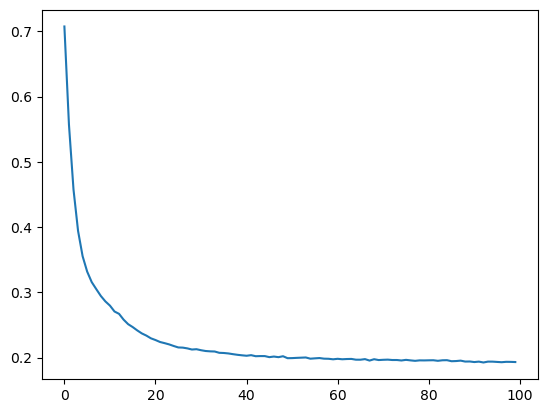

In [809]:
plt.plot(range(0,epoch+1),avg_loss)

In [810]:
with torch.inference_mode():
    total,correct=0,0
    for x,y in test_dataloader:
        x=x.to(device)
        y=y.to(device)
        predicted=model1(x)
        predicted=predicted.detach().cpu()
        output=np.where(predicted>0.5,1,0)
        total+=y.shape[0]
        correct+=((output==y).sum())
    print(f"Accuracy of {total} data is {100*(correct/total)}%")
        

Accuracy of 80 data is 90.0%
